In [49]:
import warnings

import matplotlib.pyplot as plt
import pandas
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

pandas.options.mode.chained_assignment = None

# suppress warnings
warnings.filterwarnings("ignore")

In [50]:
data_frame = pandas.read_csv('datasets/processed_risk_data.csv')

# remove the result column
x = data_frame.drop('RISK', axis=1)

# separate the result column
y = data_frame['RISK']

In [51]:
#split the datasets
trainX, testX, trainY, testY = train_test_split(x, y, test_size = 0.2, random_state=42)

In [52]:
################### SCALING

#To train a MLP network, the data should always be scaled

sc = StandardScaler()               # will be using the Standard Scaler
scaler = sc.fit(trainX)             # compute the mean and std to use for later scaling
trainX_scaled = scaler.transform(trainX)    # scale training set
testX_scaled = scaler.transform(testX)      #scale test set

# NB: no need to scale y since it is in discrete values
# NB: if y was a continuous dataset, scaling would be needed for that also

# Activation function - ‘identity’, ‘logistic’, ‘tanh’, ‘relu(default)’
# Solver - stochastic solvers eg sgd or adam || non stochastic lbfs (quasi newtonian)

mlp_clf = MLPClassifier(hidden_layer_sizes=(5,2), learning_rate='constant', learning_rate_init=0.001, max_iter = 300, activation = 'relu', solver = 'adam', shuffle=True)

# ######## TRAINING THE CLASSIFIER MODEL mlp_clf
mlp_clf.fit(trainX_scaled, trainY)

MLPClassifier(hidden_layer_sizes=(5, 2), max_iter=300)

In [53]:
y_pred = mlp_clf.predict(testX_scaled)

Accuracy: 0.7269


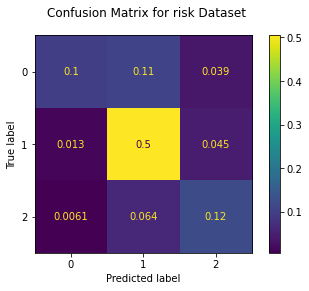

In [54]:
print('Accuracy: {:.4f}'.format(accuracy_score(testY, y_pred)))

fig = plot_confusion_matrix(mlp_clf, testX_scaled, testY, display_labels=mlp_clf.classes_, normalize='all')
fig.figure_.suptitle("Confusion Matrix for risk Dataset")
plt.show()